# _Regression notebook_

# <ins> A. Task definition and general information </ins> 

## Regression task - Predict car selling price

## general knowledge:

### About the dataset:
This dataset contains information about used cars listed on www.cardekho.com, the columns in the given dataset is as follows:

- Car_Name
- Year
- Selling_Price
- Present_Price
- Kms_Driven
- Fuel_Type
- Seller_Type
- Transmission
- Owner

# <ins> B. Basic familiarity with the Datast </ins>

## attributes information

### imports

In [12]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.ensemble import RandomForestRegressor

plt.style.use('seaborn')

In [3]:
df = pd.read_csv("car_data.csv")
df.rename(columns = {'Owner':'Past_Owners'},inplace = True)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


<br>
let's take a look at the attributes categories:

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Past_Owners    301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [101]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Past_Owners      False
dtype: bool

### basic infromation of all the data:

In [102]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


### basic infromation of data:

### let's take a look at the numeric attributes histograma:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000282C7B73730>,
      dtype=object)

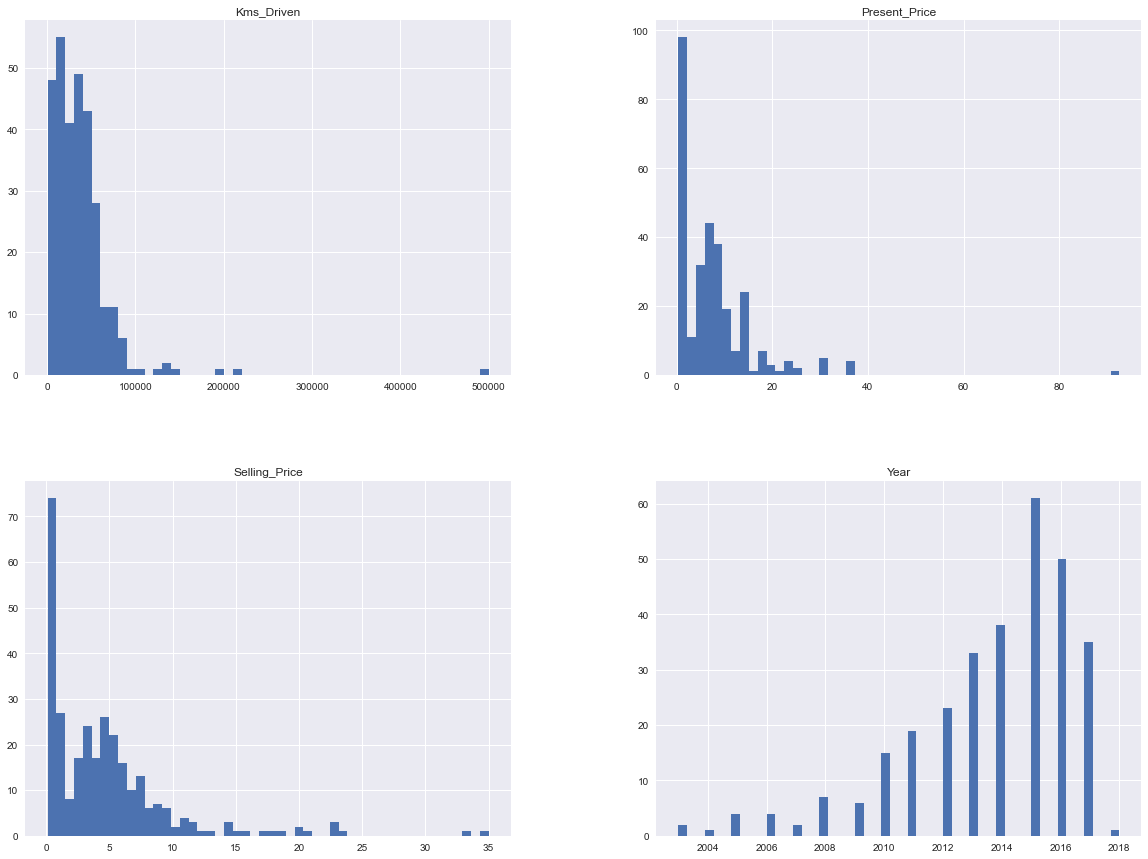

In [103]:
atttibutes_hist = df[["Kms_Driven", "Present_Price", "Selling_Price", "Year"]].hist(bins=50, figsize=(20,15))
atttibutes_hist

#### let's look at the categorial attributes histograma (as pies):


Text(0.5, 1.0, 'number of Past Owners:')

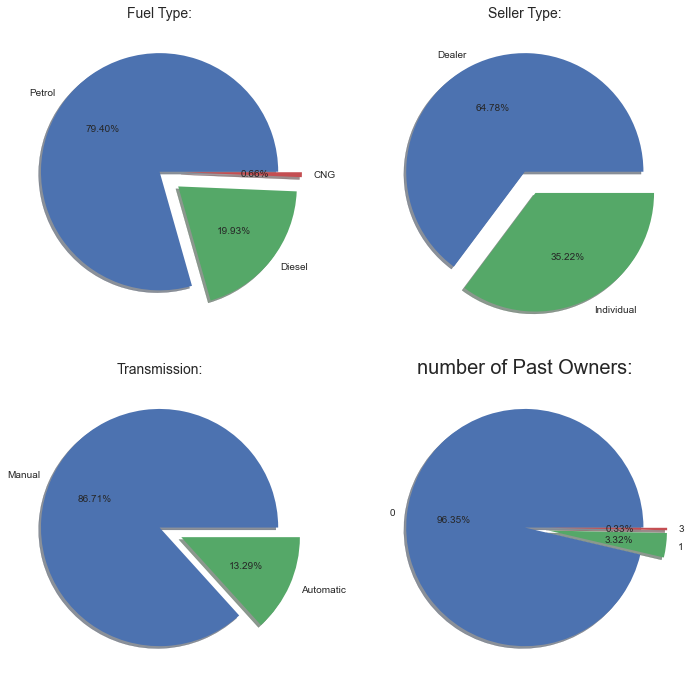

In [104]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
((ax1, ax2), (ax3, ax4)) = ax

labels = df['Fuel_Type'].value_counts().index.tolist()
values = df['Fuel_Type'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2, 0.2])
ax1.set_title("Fuel Type:", fontdict={'fontsize': 14})

labels = df['Seller_Type'].value_counts().index.tolist()[:2]
values = df['Seller_Type'].value_counts().tolist()[:2]
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2])
ax2.set_title("Seller Type:", fontdict={'fontsize': 14})

labels = df['Transmission'].value_counts().index.tolist()[:2]
values = df['Transmission'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2])
ax3.set_title("Transmission:", fontdict={'fontsize': 14})

labels = df['Past_Owners'].value_counts().index.tolist()
values = df['Past_Owners'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2, 0.2])
ax4.set_title("number of Past Owners:", fontdict={'fontsize': 20})


# <ins> C. Clean and prepare the data </ins>  

### - Unique values
#### as we can see, in the 'Fuel type' attribute, there is only 2 observation that is uniqe. because it's just one I will remove this observation.

In [4]:
print(df['Fuel_Type'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [5]:
df = df[df['Fuel_Type'] != "CNG"]
print(df['Fuel_Type'].value_counts())

Petrol    239
Diesel     60
Name: Fuel_Type, dtype: int64


## - Handeling text and categorial attributes

#### first of all, I will use "get_dummies" function to "convert" every categorial attribute.

In [6]:
df_copy = df.copy() # save for later use
df = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type', 'Transmission'])
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Past_Owners,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,1,1,0,0,1
1,sx4,2013,4.75,9.54,43000,0,1,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,1,1,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,1,1,0,0,1
4,swift,2014,4.60,6.87,42450,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0,1,0,1,0,0,1
297,brio,2015,4.00,5.90,60000,0,0,1,1,0,0,1
298,city,2009,3.35,11.00,87934,0,0,1,1,0,0,1
299,city,2017,11.50,12.50,9000,0,1,0,1,0,0,1


#### The year coulmn is not generalize, so I will generate it to Age. this is a better information.

In [7]:
df['Car_Age']= 2019-df['Year'] # the dataset is from 2019

#### I will drop the names and year columns.
It is true that in theory the names can give us a good information, but we have only 300 rows and 98 uniqe names, so, not in this case.

In [8]:
df.drop(columns=['Car_Name'], inplace=True)
df.drop(columns=['Year'], inplace=True)

In [9]:
df.head(3)

,Selling_Price,Present_Price,Kms_Driven,Past_Owners,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,Car_Age
0,3.35,5.59,27000,0,0,1,1,0,0,1,5
1,4.75,9.54,43000,0,1,0,1,0,0,1,6
2,7.25,9.85,6900,0,0,1,1,0,0,1,2


In [10]:
pd.DataFrame(data={'features': df.columns})

,features
0,Selling_Price
1,Present_Price
2,Kms_Driven
3,Past_Owners
4,Fuel_Type_Diesel
5,Fuel_Type_Petrol
6,Seller_Type_Dealer
7,Seller_Type_Individual
8,Transmission_Automatic
9,Transmission_Manual


# <ins>D. Dig into the DATA - correlations and patterns</ins>

## Let's try so uncover some patterns.

#### although linear correlations are not the only correlations we can find, it can gives us a good start. I will use Pearson’s correlation coefficient in the next matrixes.

### Correlation Matrix:

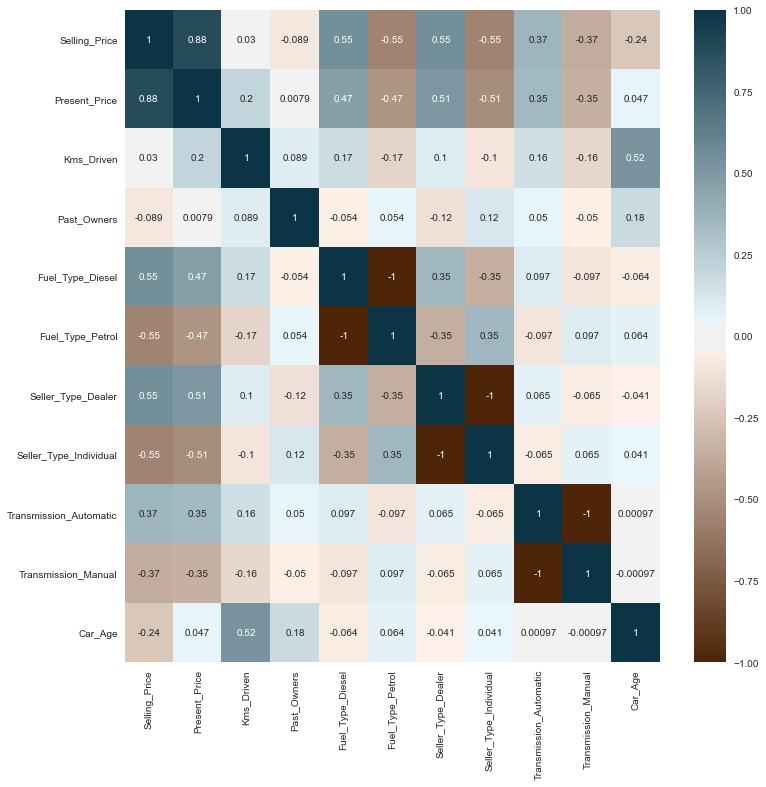

In [112]:
cmap = sns.diverging_palette(30, 230, 90, 20, as_cmap=True)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(),annot=True, cmap=cmap)
sns.set(font_scale=1)

#### high correlations with selling price:

In [113]:
corr_matrix = df.corr()
corralations = corr_matrix['Selling_Price'].sort_values(ascending = False) 
high_corr = (corralations > 0.2)|(corralations < -0.2)
pd.DataFrame(corralations[high_corr])
corralations[high_corr].index

Index(['Selling_Price', 'Present_Price', 'Seller_Type_Dealer',
       'Fuel_Type_Diesel', 'Transmission_Automatic', 'Car_Age',
       'Transmission_Manual', 'Fuel_Type_Petrol', 'Seller_Type_Individual'],
      dtype='object')

heatmap of the high correlations with Selling Price:


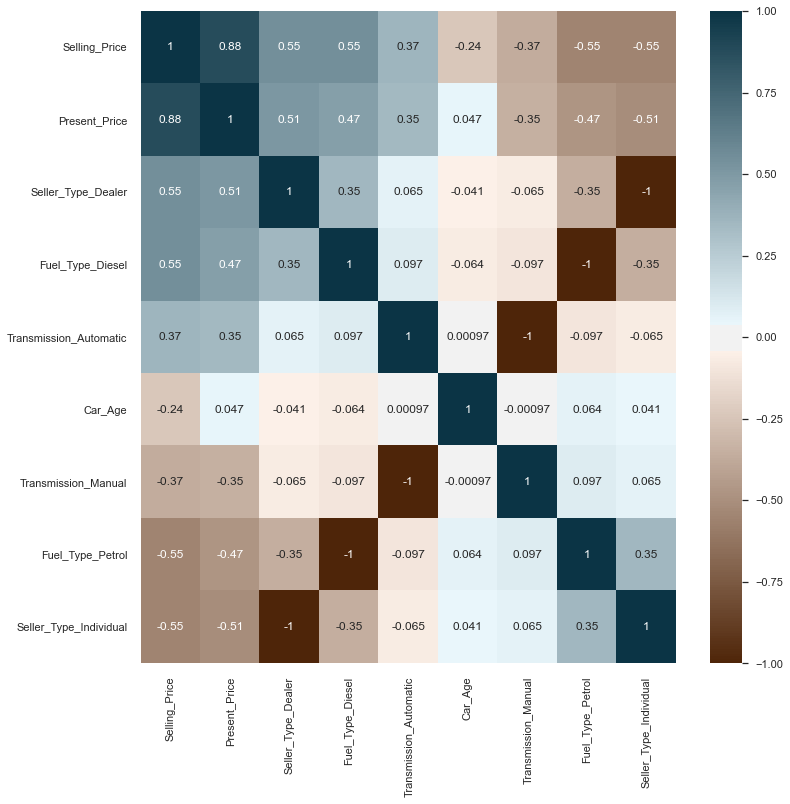

In [114]:
print("heatmap of the high correlations with Selling Price:")
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df[corralations[high_corr].index].corr(),annot=True, cmap=cmap)
sns.set(font_scale=1)

### categorial features correlations:

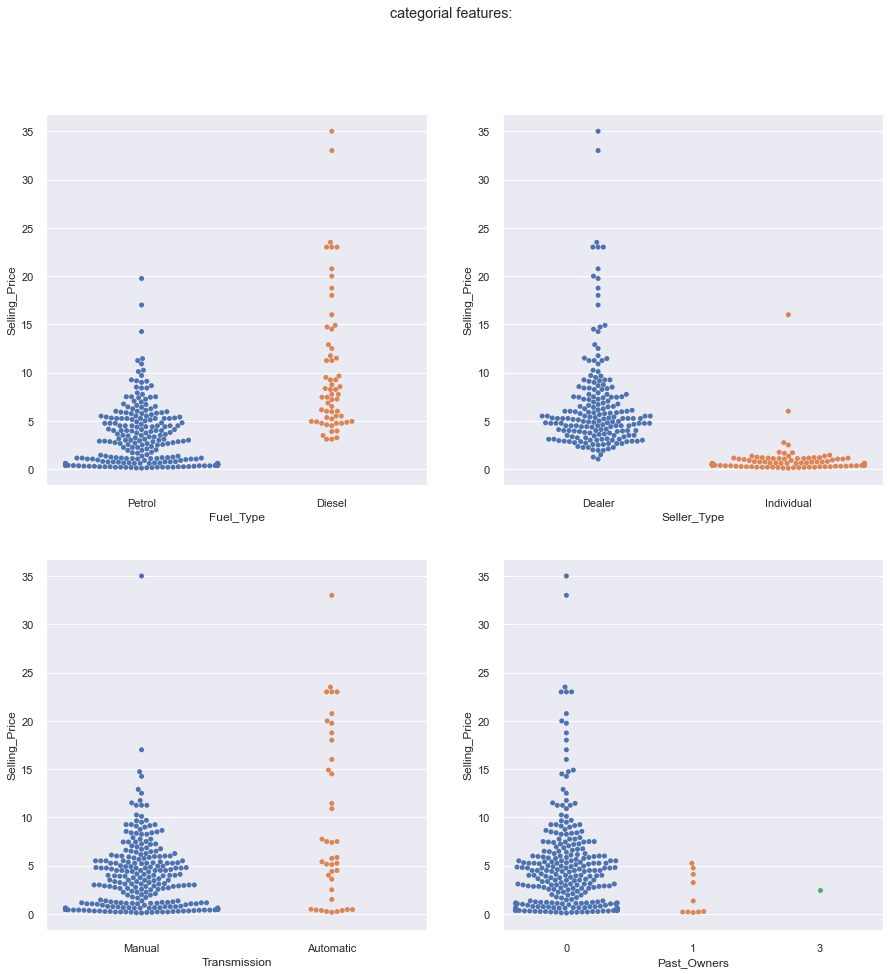

In [115]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('categorial features:')

sns.swarmplot(ax=axes[0,0], x="Fuel_Type", y="Selling_Price", data=df_copy)
sns.swarmplot(ax=axes[0,1], x="Seller_Type", y="Selling_Price", data=df_copy)
sns.swarmplot(ax=axes[1,0], x="Transmission", y="Selling_Price", data=df_copy)
sns.swarmplot(ax=axes[1,1], x="Past_Owners", y="Selling_Price", data=df_copy)

### numerical features correlations:

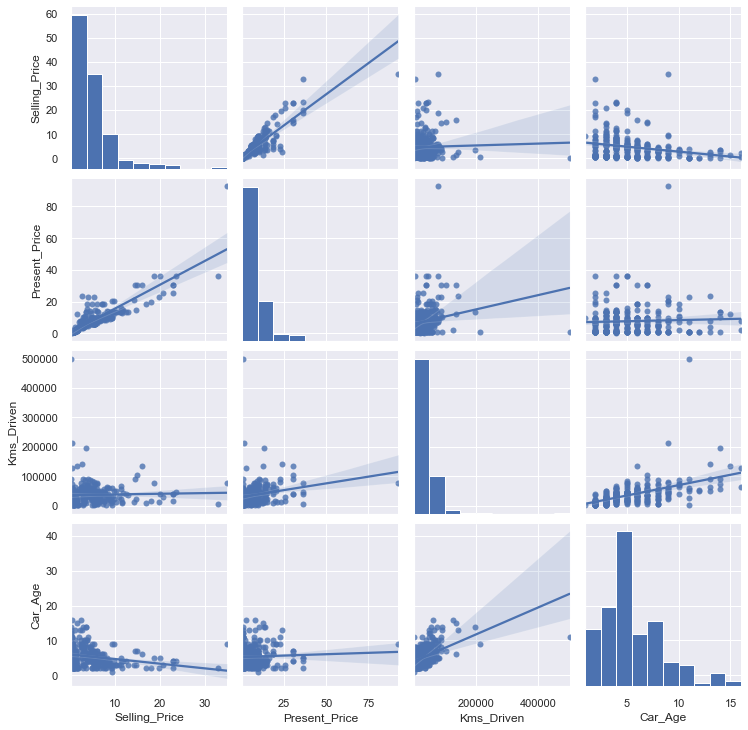

In [117]:
sns.pairplot(df[['Selling_Price', 'Present_Price', 'Kms_Driven', 'Car_Age']], kind='reg')

#### to get a better understanding of the Age affect I will plot it another way:

This bar plot represents an estimate of central tendency for a Selling-Price with the height of each rectangle and provides some indication of the uncertainty around that estimate price using error bars.


Text(0.5, 1.0, 'Selling Price range by Car Age')

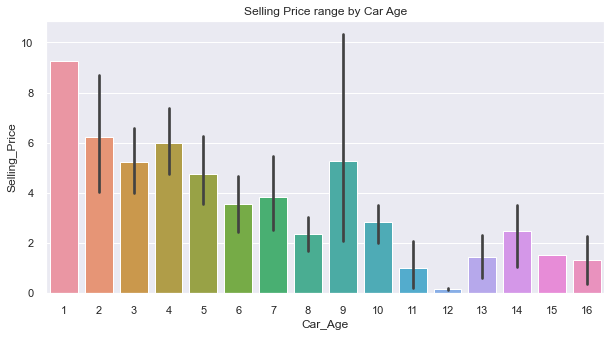

In [154]:
print('This bar plot represents an estimate of central tendency for a Selling-Price with the height of each rectangle and provides some indication of the uncertainty around that estimate price using error bars.')
fig = plt.figure(figsize=(10,5))
sns.barplot('Car_Age','Selling_Price',data=df).set_title('Selling Price range by Car Age')

# <ins> E. Select a Performance Measure </ins>

I will use 2 performance measurements: R2 and MAE.

<br>R2:
The coefficient of determination, R2 ("R squared"), is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

It is a statistic used in the context of statistical models whose main purpose is either the prediction of future outcomes or the testing of hypotheses, on the basis of other related information. It provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model.

( source - https://en.wikipedia.org/wiki/Coefficient_of_determination )

in simple words, R2 is the percentage of the explained variance from the general variance.
<br>The percentage of explained variance allows us to know how much of the variance of the dependent variable is explained by the independent variables.<br>
The higher the percentage of explained variance, the more it means that X helps us predict Y.

MAE:

from these 3 metrics:
- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

I chose MAE because it gives a basic, simple-to-understand assessment of the error that the model has.

# <ins> F. Test Set and Train Test </ins>

In [119]:
X = df.drop(columns=['Selling_Price'])
Y = df['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 42)

In [120]:
### scaling the numerical features with StandardScaler function.

In [121]:
scaler_standard = StandardScaler()
scaler_MinMax = MinMaxScaler()

X_train_standardized = X_train.copy()
X_test_standardized = X_test.copy()
X_train_normalized = X_train.copy()
X_test_normalized = X_test.copy()

numerical_features = ['Present_Price', 'Kms_Driven', 'Past_Owners', 'Car_Age']

# Standardization:
scaler_standard.fit(X_train[numerical_features])
X_train_standardized[numerical_features] = scaler_standard.transform(X_train_standardized[numerical_features])

# the scaling is with the the same fitted scaler (by the train data)
X_test_standardized[numerical_features] = scaler_standard.transform(X_test_standardized[numerical_features])

# Normalization:
scaler_MinMax.fit(X_train[numerical_features])
X_train_normalized[numerical_features] = scaler_MinMax.transform(X_train_normalized[numerical_features])

# the scaling is with the the same fitted scaler (by the train data)
X_test_normalized[numerical_features] = scaler_MinMax.transform(X_test_normalized[numerical_features])


In [122]:
print('note: the mean is 0 and std is 1')
X_train_standardized.describe()[numerical_features].iloc[[1, 2]]

note: the mean is 0 and std is 1


,Present_Price,Kms_Driven,Past_Owners,Car_Age
mean,7.930164e-18,-5.749369e-17,5.253734e-17,3.965082e-18
std,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00


In [123]:
print('note: the min is 0 and max is 1')
indexes = [False, False, False, True, False, False, False, True]
X_train_normalized.describe()[numerical_features].iloc[indexes]

note: the min is 0 and max is 1


,Present_Price,Kms_Driven,Past_Owners,Car_Age
min,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0


### Now we have scaled test set and train set, we can continue to find a good model!
<br> <br>

### but first, let's see the dummy model:

In [124]:
import numpy as np
from sklearn.dummy import DummyRegressor

dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
R2_score = dummy_regr.score(X_test, y_test)
y_predict = dummy_regr.predict(X_test)
mae = MAE(y_test, y_predict)
print('The dummy model have a R2 score of ' + str(R2_score)[:6] + " as expected (around 0), and mean absolute error of " + str(mae)[:4])

The dummy model have a R2 score of -0.003 as expected (around 0), and mean absolute error of 3.70


# <ins> G. Linear-Regression Model </ins>

In [18]:
LR = LinearRegression()

In [131]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

R2_scores_standardized = cross_val_score(LR, X_train_standardized, y_train, cv=kf)
y_predict_standardized = cross_val_predict(LR, X_train_standardized, y_train, cv=kf)
mae_standarsized = MAE(y_train, y_predict_standardized)

R2_scores_normalized = cross_val_score(LR, X_train_normalized, y_train, cv=kf)
y_predict_normalized = cross_val_predict(LR, X_train_normalized, y_train, cv=kf)
mae_normalized = MAE(y_train, y_predict_normalized)

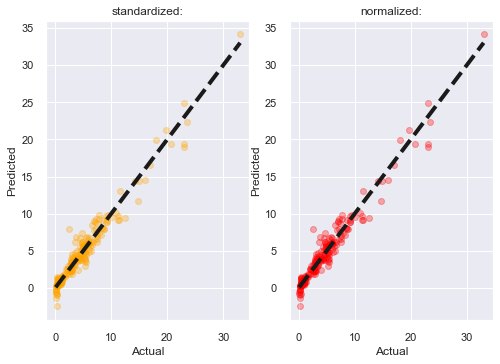

In [178]:
fig, axes = plt.subplots(1,2)
((ax1, ax2)) = axes

y_predicted = cross_val_predict(LR, X_train_standardized, y_train, cv=kf)
ax1.scatter(y_train, y_predicted, alpha=0.3, color='orange')
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.set_title('standardized:')

y_predicted = cross_val_predict(LR, X_train_normalized, y_train, cv=kf)
ax2.scatter(y_train, y_predicted, alpha=0.3, color='red')
ax2.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predicted')
ax2.set_title('normalized:')

plt.show()

#### standadized train set cross validation:

In [134]:
print("the scores of cross validation are:")
print(scores_standardized)
print()
print("mean R2 is: " + str(scores_standardized.mean())[:5] + " with std of  " + str(scores_standardized.std())[:5] + " and MAE of " + str(mae_standarsized)[:6])

the scores of cross validation are:
[0.9238542  0.91135592 0.88288836 0.90675351 0.69332822 0.65915647
 0.8269947  0.83843742 0.87613601 0.89128414]

mean R2 is: 0.841 with std of  0.087 and MAE of 1.1581


#### normalized train set cross validation:

In [135]:
print("the scores of cross validation are:")
print(scores_normalized)
print()
print("mean R2 is: " + str(scores_normalized.mean())[:5] + " with std of  " + str(scores_normalized.std())[:5] + " and MAE of " + str(mae_normalized)[:6])

the scores of cross validation are:
[0.9238542  0.91135592 0.88288836 0.90675351 0.69332822 0.65915647
 0.8269947  0.83843742 0.87613601 0.89128414]

mean R2 is: 0.841 with std of  0.087 and MAE of 1.1581


- this is preaty good, but I think that I can improve that with a creating new features!
- note: it looks like the scaling method isn't matter, I will check that later also. but you can see below that the values of the features are different.

In [137]:
X_train_normalized

,Present_Price,Kms_Driven,Past_Owners,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,Car_Age
227,0.114453,0.265882,0.0,0,1,1,0,0,1,0.428571
80,0.405737,0.105882,0.0,1,0,1,0,0,1,0.071429
68,0.373712,0.411765,0.0,0,1,1,0,0,1,0.428571
298,0.297410,0.411454,0.0,0,1,1,0,0,1,0.571429
194,0.013005,0.232941,0.0,0,1,0,1,0,1,0.642857
...,...,...,...,...,...,...,...,...,...,...
190,0.011974,0.280000,0.0,0,1,0,1,0,1,0.642857
73,0.150097,0.200000,0.0,0,1,1,0,0,1,0.428571
108,0.032860,0.082353,0.0,0,1,0,1,0,1,0.071429
272,0.269563,0.127529,0.0,0,1,1,0,0,1,0.142857


In [138]:
X_train_standardized


,Present_Price,Kms_Driven,Past_Owners,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,Car_Age
227,-0.403933,0.834631,-0.169419,0,1,1,0,0,1,0.955228
80,1.115789,-0.403718,-0.169419,1,0,1,0,0,1,-0.784374
68,0.948707,1.963713,-0.169419,0,1,1,0,0,1,0.955228
298,0.550615,1.961309,-0.169419,0,1,1,0,0,1,1.651069
194,-0.933221,0.579676,-0.169419,0,1,0,1,0,1,1.998990
...,...,...,...,...,...,...,...,...,...,...
190,-0.938596,0.943897,-0.169419,0,1,0,1,0,1,1.998990
73,-0.217963,0.324722,-0.169419,0,1,1,0,0,1,0.955228
108,-0.829630,-0.585828,-0.169419,0,1,0,1,0,1,-0.784374
272,0.405326,-0.236177,-0.169419,0,1,1,0,0,1,-0.436454


### I will make new featurs to use the data more efficiently:

In [14]:
# create 3 more features:
df['KMs_Per_year'] = df['Kms_Driven']/df['Car_Age']
df['Present_Price_Age_ratio'] = df['Present_Price']/df['Car_Age']
df['Present_Price_KMs_ratio'] = df['Present_Price']/df['Kms_Driven']
df.describe()[['KMs_Per_year', 'Present_Price_Age_ratio', 'Present_Price_KMs_ratio']]

,KMs_Per_year,Present_Price_Age_ratio,Present_Price_KMs_ratio
count,299.000000,299.000000,299.000000
mean,6759.328845,1.806317,0.000356
std,4575.118147,2.251820,0.000591
min,166.666667,0.040714,0.000001
25%,3775.000000,0.315000,0.000086
50%,6428.571429,1.316667,0.000194
75%,9000.000000,2.427333,0.000353
max,45454.545455,18.115000,0.006038


In [15]:
corr_matrix = df.corr()
corr_matrix['Selling_Price'].sort_values(ascending=False)

Selling_Price              1.000000
Present_Price_Age_ratio    0.934919
Present_Price              0.879131
Seller_Type_Dealer         0.553425
Fuel_Type_Diesel           0.551948
Present_Price_KMs_ratio    0.548595
Transmission_Automatic     0.366627
KMs_Per_year               0.262328
Kms_Driven                 0.029546
Past_Owners               -0.088741
Car_Age                   -0.236047
Transmission_Manual       -0.366627
Fuel_Type_Petrol          -0.551948
Seller_Type_Individual    -0.553425
Name: Selling_Price, dtype: float64

- Present_Price_Age_ratio is very significant
- Present_Price_KMs_ratio more significant than KMS alone
- KMs_Per_year is more significant than KMS ang Car Age separately

##### Let's see those correlations:

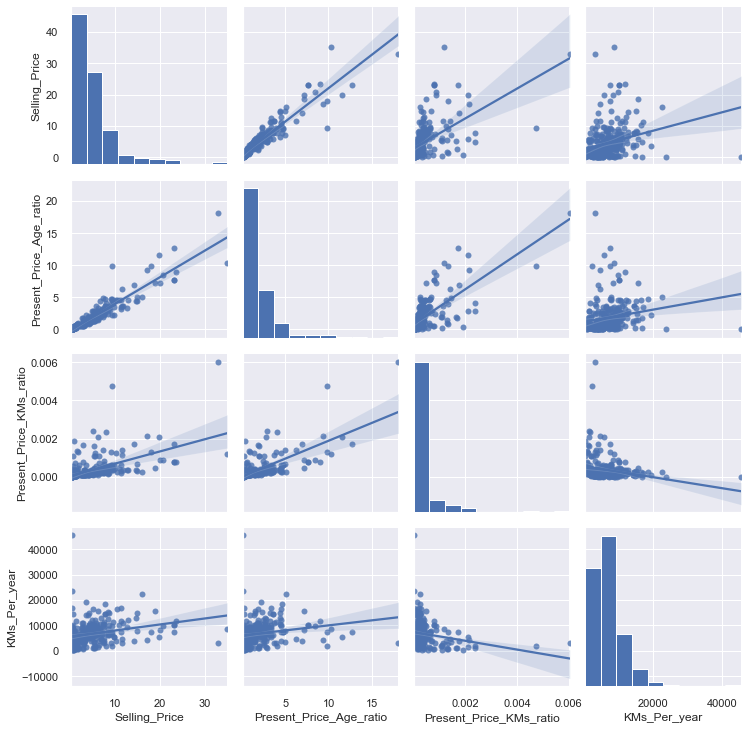

In [155]:
sns.pairplot(df[['Selling_Price', 'Present_Price_Age_ratio', 'Present_Price_KMs_ratio', 'KMs_Per_year']], kind='reg')

I will repeat the previous steps to include the new features in the train and test sets. 
<br>note: the test and train sets rows will not change because Im using the same random_state. so, the rows will remain the same in each set.

### Scaling the numerical features (including the new ones) with StandardScaler and MinMax functions:

In [16]:
# test train split
X = df.drop(columns=['Selling_Price'])
Y = df['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 42)

# scaling the numerical features
scaler_standard = StandardScaler()
scaler_MinMax = MinMaxScaler()

X_train_standardized = X_train.copy()
X_test_standardized = X_test.copy()
X_train_normalized = X_train.copy()
X_test_normalized = X_test.copy()

numerical_features = ['Present_Price', 'Kms_Driven', 'Past_Owners', 'Car_Age', 'KMs_Per_year', 'Present_Price_Age_ratio', 'Present_Price_KMs_ratio']

# Standardization:
scaler_standard.fit(X_train[numerical_features])
X_train_standardized[numerical_features] = scaler_standard.transform(X_train_standardized[numerical_features])

# the scaling is with the the same fitted scaler (by the train data)
X_test_standardized[numerical_features] = scaler_standard.transform(X_test_standardized[numerical_features])

# Normalization:
scaler_MinMax.fit(X_train[numerical_features])
X_train_normalized[numerical_features] = scaler_MinMax.transform(X_train_normalized[numerical_features])

# the scaling is with the the same fitted scaler (by the train data)
X_test_normalized[numerical_features] = scaler_MinMax.transform(X_test_normalized[numerical_features])


In [20]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

R2_standardized = cross_val_score(LR, X_train_standardized, y_train, cv=kf)
y_predict_standardized = cross_val_predict(LR, X_train_standardized, y_train, cv=kf)
mae_standarsized = MAE(y_train, y_predict_standardized)

print('standartize:')
print('R2 score: ' + str(R2_standardized.mean())[:6])
print('R2 std: ' + str(R2_standardized.std())[:6])
print('MAE: ' + str(mae_standarsized)[:6])

print()

R2_normalized = cross_val_score(LR, X_train_normalized, y_train, cv=kf)
y_predict_normalized = cross_val_predict(LR, X_train_standardized, y_train, cv=kf)
mae_normalized = MAE(y_train, y_predict_normalized)

print('normalize: ')
print('R2 score: ' + str(R2_normalized.mean())[:6])
print('R2 std: ' + str(R2_normalized.std())[:6])
print('MAE: ' + str(mae_normalized)[:6])

standartize:
R2 score: 0.9436
R2 std: 0.0204
MAE: 0.7137

normalize: 
R2 score: 0.9436
R2 std: 0.0204
MAE: 0.7137


### This is a big improvment!
note that the results are still the same, it seems that normalization and standatization have the same affect on linear regression models.
<br>I will use only one of them the next step.

<br> I will try to increase the R2 with feature selection. 




## feature selection:

In [58]:
# I will use this function for make a copy of
# train set by specific correlation limit.

# copy X with columns which grater than specific limit:
def copy_by_corr_limit(X, lim, limits):
    X_copy = X.copy()
    s = (limits < lim)
    X_copy = X_copy[X_copy.columns[~s]]
    return X_copy

In [151]:
print('I will use the next list to select features by correlations')
print('correlations (without the sign+-):')
correlations = abs(corr_matrix['Selling_Price']).sort_values(ascending=False)
correlations.drop('Selling_Price', inplace=True)
correlations

I will use the next list to select features by correlations
correlations (without the sign+-):


Present_Price_Age_ratio    0.934919
Present_Price              0.879131
Seller_Type_Individual     0.553425
Seller_Type_Dealer         0.553425
Fuel_Type_Diesel           0.551948
Fuel_Type_Petrol           0.551948
Present_Price_KMs_ratio    0.548595
Transmission_Automatic     0.366627
Transmission_Manual        0.366627
KMs_Per_year               0.262328
Car_Age                    0.236047
Past_Owners                0.088741
Kms_Driven                 0.029546
Name: Selling_Price, dtype: float64

In [153]:
corr_limits = [0, 0.03, 0.09, 0.25, 0.35, 0.40, 0.55, 0.552, 0.555, 0.9]

mean_scores = []
std_scores = []
mae_scores = []

for limit in corr_limits:
    X_train_copy = copy_by_corr_limit(X_train_stansadized, limit, correlations)
    R2_scores = cross_val_score(LR, X_train_copy, y_train, cv=kf)
    y_predict = cross_val_predict(LR, X_train_copy, y_train, cv=kf)
    mae_score = MAE(y_train, y_predict)

    
    mean_scores.append(R2_scores.mean())
    std_scores.append(R2_scores.std())
    mae_scores.append(mae_score)
    
pd.DataFrame(data={'lim correlation:':corr_limits, 'R2_score': mean_scores, 'R2_std': std_scores, 'MAE score': mae_scores}) 

,lim correlation:,R2_score,R2_std,MAE score
0,0.000,0.943682,0.020420,0.713764
1,0.030,0.943740,0.020252,0.713953
2,0.090,0.834060,0.112351,1.129761
3,0.250,0.841019,0.087597,1.158149
4,0.350,0.820258,0.117508,1.217651
5,0.400,0.814790,0.127190,1.219169
6,0.550,0.814790,0.127190,1.219169
7,0.552,0.817433,0.121175,1.215311
8,0.555,0.791201,0.130446,1.239433
9,0.900,0.758783,0.139454,1.271603


this is a minority improvment, so it is not significant. that is why I will go with 0.00 correlation limit.
## Testing our best linear regression model:

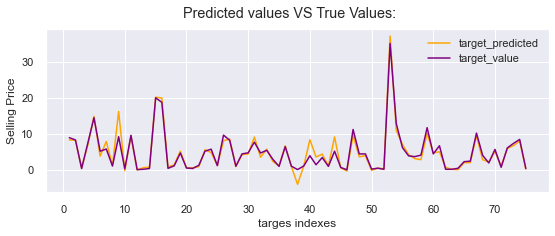

,R2_score,MAE score
test LR model,0.936109,0.814803


In [204]:
X_train_copy = copy_by_corr_limit(X_train_stansadized, 0.00, correlations)
X_test_copy = copy_by_corr_limit(X_test_stansadized, 0.00, correlations)

LR.fit(X_train_copy, y_train)
R2_score = LR.score(X_test_copy, y_test)
y_predict = LR.predict(X_test_copy)
mae_score = MAE(y_test, y_predict)

indexes = list(range(1, len(y_predict)+1))
fig, axs = plt.subplots(1, 1, figsize=(9, 3), sharey=True)
axs.plot(indexes, y_predict, label='target_predicted', color='orange')
axs.plot(indexes, y_test, label='target_value', color='purple')
axs.legend()
axs.set_xlabel('targes indexes')
axs.set_ylabel('Selling Price')
fig.suptitle('Predicted values VS True Values:')
plt.show()

pd.DataFrame(index=['test LR model'], data={'R2_score': R2_score, 'MAE score': mae_score})

# DR. Roi Yuzovich! this _linear regression_ model has R2 score which is a 10% improvement compared to  top-5 most voted notebooks at kaggle for this DATASET. The main reason is because I added 3 new features (it was my idea, It did not appear in any notebook) ! :-)
you can check here: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho/code?datasetId=33080&sortBy=voteCount

<br>
<br>
<br>

# Random Forest Regressor model

In [24]:
RFR = RandomForestRegressor()

In [31]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

R2_scores_standardized = cross_val_score(RFR, X_train_standardized, y_train, cv=kf)
y_predict_standardized = cross_val_predict(RFR, X_train_standardized, y_train, cv=kf)
mae_standarsized = MAE(y_train, y_predict_standardized)

R2_scores_normalized = cross_val_score(RFR, X_train_normalized, y_train, cv=kf)
y_predict_normalized = cross_val_predict(RFR, X_train_normalized, y_train, cv=kf)
mae_normalized = MAE(y_train, y_predict_normalized)

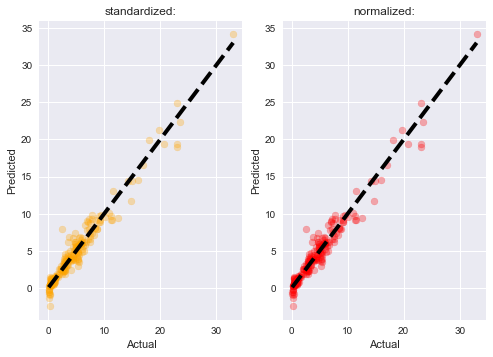

In [32]:
fig, axes = plt.subplots(1,2)
((ax1, ax2)) = axes

y_predicted = cross_val_predict(LR, X_train_standardized, y_train, cv=kf)
ax1.scatter(y_train, y_predicted, alpha=0.3, color='orange')
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.set_title('standardized:')

y_predicted = cross_val_predict(LR, X_train_normalized, y_train, cv=kf)
ax2.scatter(y_train, y_predicted, alpha=0.3, color='red')
ax2.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predicted')
ax2.set_title('normalized:')

plt.show()

#### standadized train set cross validation:

In [34]:
print("the scores of cross validation are:")
print(R2_scores_standardized)
print()
print("mean R2 is: " + str(R2_scores_standardized.mean())[:5] + " with std of  " + str(R2_scores_standardized.std())[:5] + " and MAE of " + str(mae_standarsized)[:6])

the scores of cross validation are:
[0.98250795 0.9469495  0.95928115 0.94626921 0.95061952 0.856579
 0.87387872 0.86758885 0.9829711  0.93834467]

mean R2 is: 0.930 with std of  0.044 and MAE of 0.6339


#### normalized train set cross validation:

In [35]:
print("the scores of cross validation are:")
print(R2_scores_normalized)
print()
print("mean R2 is: " + str(R2_scores_normalized.mean())[:5] + " with std of  " + str(R2_scores_normalized.std())[:5] + " and MAE of " + str(mae_normalized)[:6])

the scores of cross validation are:
[0.98254082 0.94859145 0.96116102 0.95194384 0.94729337 0.89771853
 0.87222883 0.87302673 0.98342325 0.94923732]

mean R2 is: 0.936 with std of  0.039 and MAE of 0.6298


This is a great score! let's see the score with thw test set:

### Random Forest Regressor standardized data

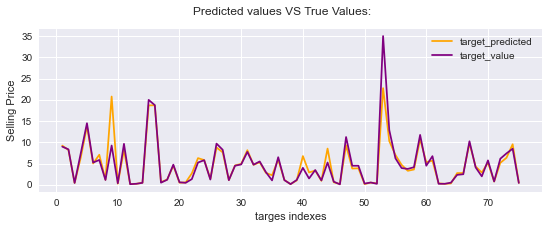

,R2_score,MAE score
test LR model,0.853468,0.847017


In [66]:
RFR = RandomForestRegressor()

RFR.fit(X_train_standardized, y_train)
R2_score = RFR.score(X_test_standardized, y_test)
y_predict = RFR.predict(X_test_standardized)
mae_score = MAE(y_test, y_predict)

indexes = list(range(1, len(y_predict)+1))
fig, axs = plt.subplots(1, 1, figsize=(9, 3), sharey=True)
axs.plot(indexes, y_predict, label='target_predicted', color='orange')
axs.plot(indexes, y_test, label='target_value', color='purple')
axs.legend()
axs.set_xlabel('targes indexes')
axs.set_ylabel('Selling Price')
fig.suptitle('Predicted values VS True Values:')
plt.show()

pd.DataFrame(index=['test LR model'], data={'R2_score': R2_score, 'MAE score': mae_score}) 


### Random Forest Regressor normalized data

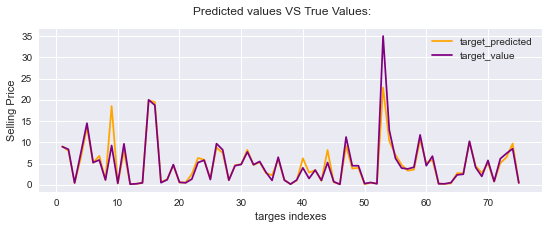

,R2_score,MAE score
test LR model,0.877297,0.798125


In [67]:
RFR = RandomForestRegressor()

RFR.fit(X_train_normalized, y_train)
R2_score = RFR.score(X_test_normalized, y_test)
y_predict = RFR.predict(X_test_normalized)
mae_score = MAE(y_test, y_predict)

indexes = list(range(1, len(y_predict)+1))
fig, axs = plt.subplots(1, 1, figsize=(9, 3), sharey=True)
axs.plot(indexes, y_predict, label='target_predicted', color='orange')
axs.plot(indexes, y_test, label='target_value', color='purple')
axs.legend()
axs.set_xlabel('targes indexes')
axs.set_ylabel('Selling Price')
fig.suptitle('Predicted values VS True Values:')
plt.show()

pd.DataFrame(index=['test LR model'], data={'R2_score': R2_score, 'MAE score': mae_score}) 


this score is pretty good.

<br>
- I will try to increase the R2 and the MAE of the Random Forest Regressor model by choosing the best hyperparams.

## Randomized Search:

In [36]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [37]:
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = RFR, param_distributions = random_grid, n_iter = 100, cv = kf, verbose=2, random_state=42, n_jobs = -1, scoring='r2')
# Fit the random search model
rf_random.fit(X_train_normalized, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 14.4min finished


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='r2', verbose=2)

#### Massive improvement:

In [80]:
print("best R2 score is:")
print(rf_random.best_score_)

best R2 score is:
0.9450917217388994


In [42]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}

## Testing best Random forest Regressor model:

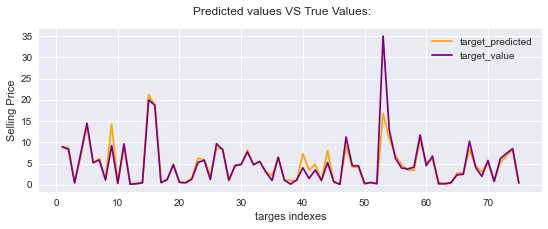

,R2_score,MAE score
test RFR model,0.821041,0.827212


In [76]:
rf = rf_random.best_estimator_
rf.fit(X_train_normalized, y_train)

R2_score = rf.score(X_test_normalized, y_test)
y_predict = rf.predict(X_test_normalized)
mae_score = MAE(y_test, y_predict)

indexes = list(range(1, len(y_predict)+1))
fig, axs = plt.subplots(1, 1, figsize=(9, 3), sharey=True)
axs.plot(indexes, y_predict, label='target_predicted', color='orange')
axs.plot(indexes, y_test, label='target_value', color='purple')
axs.legend()
axs.set_xlabel('targes indexes')
axs.set_ylabel('Selling Price')
fig.suptitle('Predicted values VS True Values:')
plt.show()

pd.DataFrame(index=['test RFR model'], data={'R2_score': R2_score, 'MAE score': mae_score}) 


#### Although the high score with the cross validation, the test is not so good.
#### I will check the feature importances list, and if I can use feature selection to improve the model.
## feature selection:

In [78]:
rf.feature_importances_
feature_imp = pd.Series(rf.feature_importances_,index=X_train_normalized.columns).sort_values(ascending=False)
print("feature importances list:")
feature_imp

feature importances list:


Present_Price_Age_ratio    0.345036
Present_Price              0.235196
Present_Price_KMs_ratio    0.081082
Seller_Type_Dealer         0.075839
Seller_Type_Individual     0.063234
Fuel_Type_Diesel           0.039137
Transmission_Automatic     0.036606
Fuel_Type_Petrol           0.035496
Transmission_Manual        0.033567
Car_Age                    0.020000
KMs_Per_year               0.018020
Kms_Driven                 0.016724
Past_Owners                0.000063
dtype: float64

In [81]:
imp_limits = [0, 0.0001, 0.017, 0.02, 0.03, 0.035, 0.036, 0.037, 0.04, 0.07, 0.08, 0.1, 0.3]

mean_scores = []
std_scores = []
mae_scores = []

for limit in imp_limits:
    X_train_copy = copy_by_corr_limit(X_train_normalized, limit, feature_imp)
    R2_scores = cross_val_score(rf, X_train_copy, y_train, cv=kf)
    y_predict = cross_val_predict(rf, X_train_copy, y_train, cv=kf)
    mae_score = MAE(y_train, y_predict)

    mean_scores.append(R2_scores.mean())
    std_scores.append(R2_scores.std())
    mae_scores.append(mae_score)
    
pd.DataFrame(data={'lim importance:':imp_limits, 'R2_score': mean_scores, 'R2_std': std_scores, 'MAE score': mae_scores}) 

,lim importance:,R2_score,R2_std,MAE score
0,0.0000,0.944041,0.037094,0.638646
1,0.0001,0.940863,0.035152,0.639153
2,0.0170,0.909997,0.047718,0.855245
3,0.0200,0.869752,0.047776,1.010078
4,0.0300,0.872519,0.048140,1.021819
5,0.0350,0.851325,0.062534,1.086179
6,0.0360,0.842995,0.073126,1.150295
7,0.0370,0.854068,0.074120,1.087041
8,0.0400,0.866690,0.077390,0.994124
9,0.0700,0.879687,0.073198,0.946802


The best score is without any limit. this is what we did earlier, so it didn't help us as I hoped.


# <ins>My best model:</ins>

### Linear Regression with the params below:

In [42]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}

### The scores are:

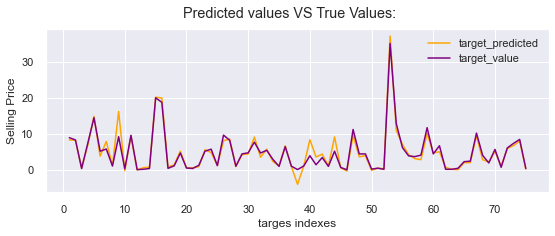

,R2_score,MAE score
test LR model,0.936109,0.814803


In [204]:
X_train_copy = copy_by_corr_limit(X_train_stansadized, 0.00, correlations)
X_test_copy = copy_by_corr_limit(X_test_stansadized, 0.00, correlations)

LR.fit(X_train_copy, y_train)
R2_score = LR.score(X_test_copy, y_test)
y_predict = LR.predict(X_test_copy)
mae_score = MAE(y_test, y_predict)

indexes = list(range(1, len(y_predict)+1))
fig, axs = plt.subplots(1, 1, figsize=(9, 3), sharey=True)
axs.plot(indexes, y_predict, label='target_predicted', color='orange')
axs.plot(indexes, y_test, label='target_value', color='purple')
axs.legend()
axs.set_xlabel('targes indexes')
axs.set_ylabel('Selling Price')
fig.suptitle('Predicted values VS True Values:')
plt.show()

pd.DataFrame(index=['test LR model'], data={'R2_score': R2_score, 'MAE score': mae_score}) 


# DR. Roi Yuzovich! this _linear regression_ model has R2 score which is a 10% improvement compared to  top-5 most voted notebooks at kaggle for this DATASET. The main reason is because I added 3 new features (it was my idea, It did not appear in any notebook) ! :-)
you can check here: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho/code?datasetId=33080&sortBy=voteCount